In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import cv2

In [61]:
train_data_path = '/content/drive/MyDrive/7-7 dataset'

width = height = 224

idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    brightness_range = (0.6,1.2),
    zoom_range = 0.1,
    shear_range = 0.3,
    rotation_range = 15,
    validation_split = 0.2
)

train_data = idg.flow_from_directory(
    train_data_path,
    target_size = (width,height),
    subset = "training"
)
val_data = idg.flow_from_directory(
    train_data_path,
    target_size = (width,height),
    subset = "validation"
)

Found 1090 images belonging to 14 classes.
Found 268 images belonging to 14 classes.


In [79]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights = 'imagenet',
    input_shape=(width,height,3),
    pooling = 'avg'
)

model = tf.keras.models.Sequential([
        base_model,
        Dropout(0.3),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(256,activation='relu'),
        Dense(14,activation='softmax')

])

In [80]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [81]:
model.fit(train_data,validation_data=val_data,epochs=15)

Epoch 1/15
35/35 [==============================] - 60s 852ms/step - loss: 2.5669 - accuracy: 0.1468 - val_loss: 2.4993 - val_accuracy: 0.1866
Epoch 2/15
35/35 [==============================] - 34s 953ms/step - loss: 2.1728 - accuracy: 0.3716 - val_loss: 2.0299 - val_accuracy: 0.3582
Epoch 3/15
35/35 [==============================] - 30s 846ms/step - loss: 1.5457 - accuracy: 0.6193 - val_loss: 1.3491 - val_accuracy: 0.5597
Epoch 4/15
35/35 [==============================] - 28s 810ms/step - loss: 0.9625 - accuracy: 0.7881 - val_loss: 0.7580 - val_accuracy: 0.7873
Epoch 5/15
35/35 [==============================] - 29s 816ms/step - loss: 0.5879 - accuracy: 0.8633 - val_loss: 0.5231 - val_accuracy: 0.8358
Epoch 6/15
35/35 [==============================] - 28s 807ms/step - loss: 0.3418 - accuracy: 0.9312 - val_loss: 0.3544 - val_accuracy: 0.9030
Epoch 7/15
35/35 [==============================] - 28s 808ms/step - loss: 0.2653 - accuracy: 0.9431 - val_loss: 0.3643 - val_accuracy: 0.8881

In [82]:
model.save('face_recognition.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 7s 657ms/step


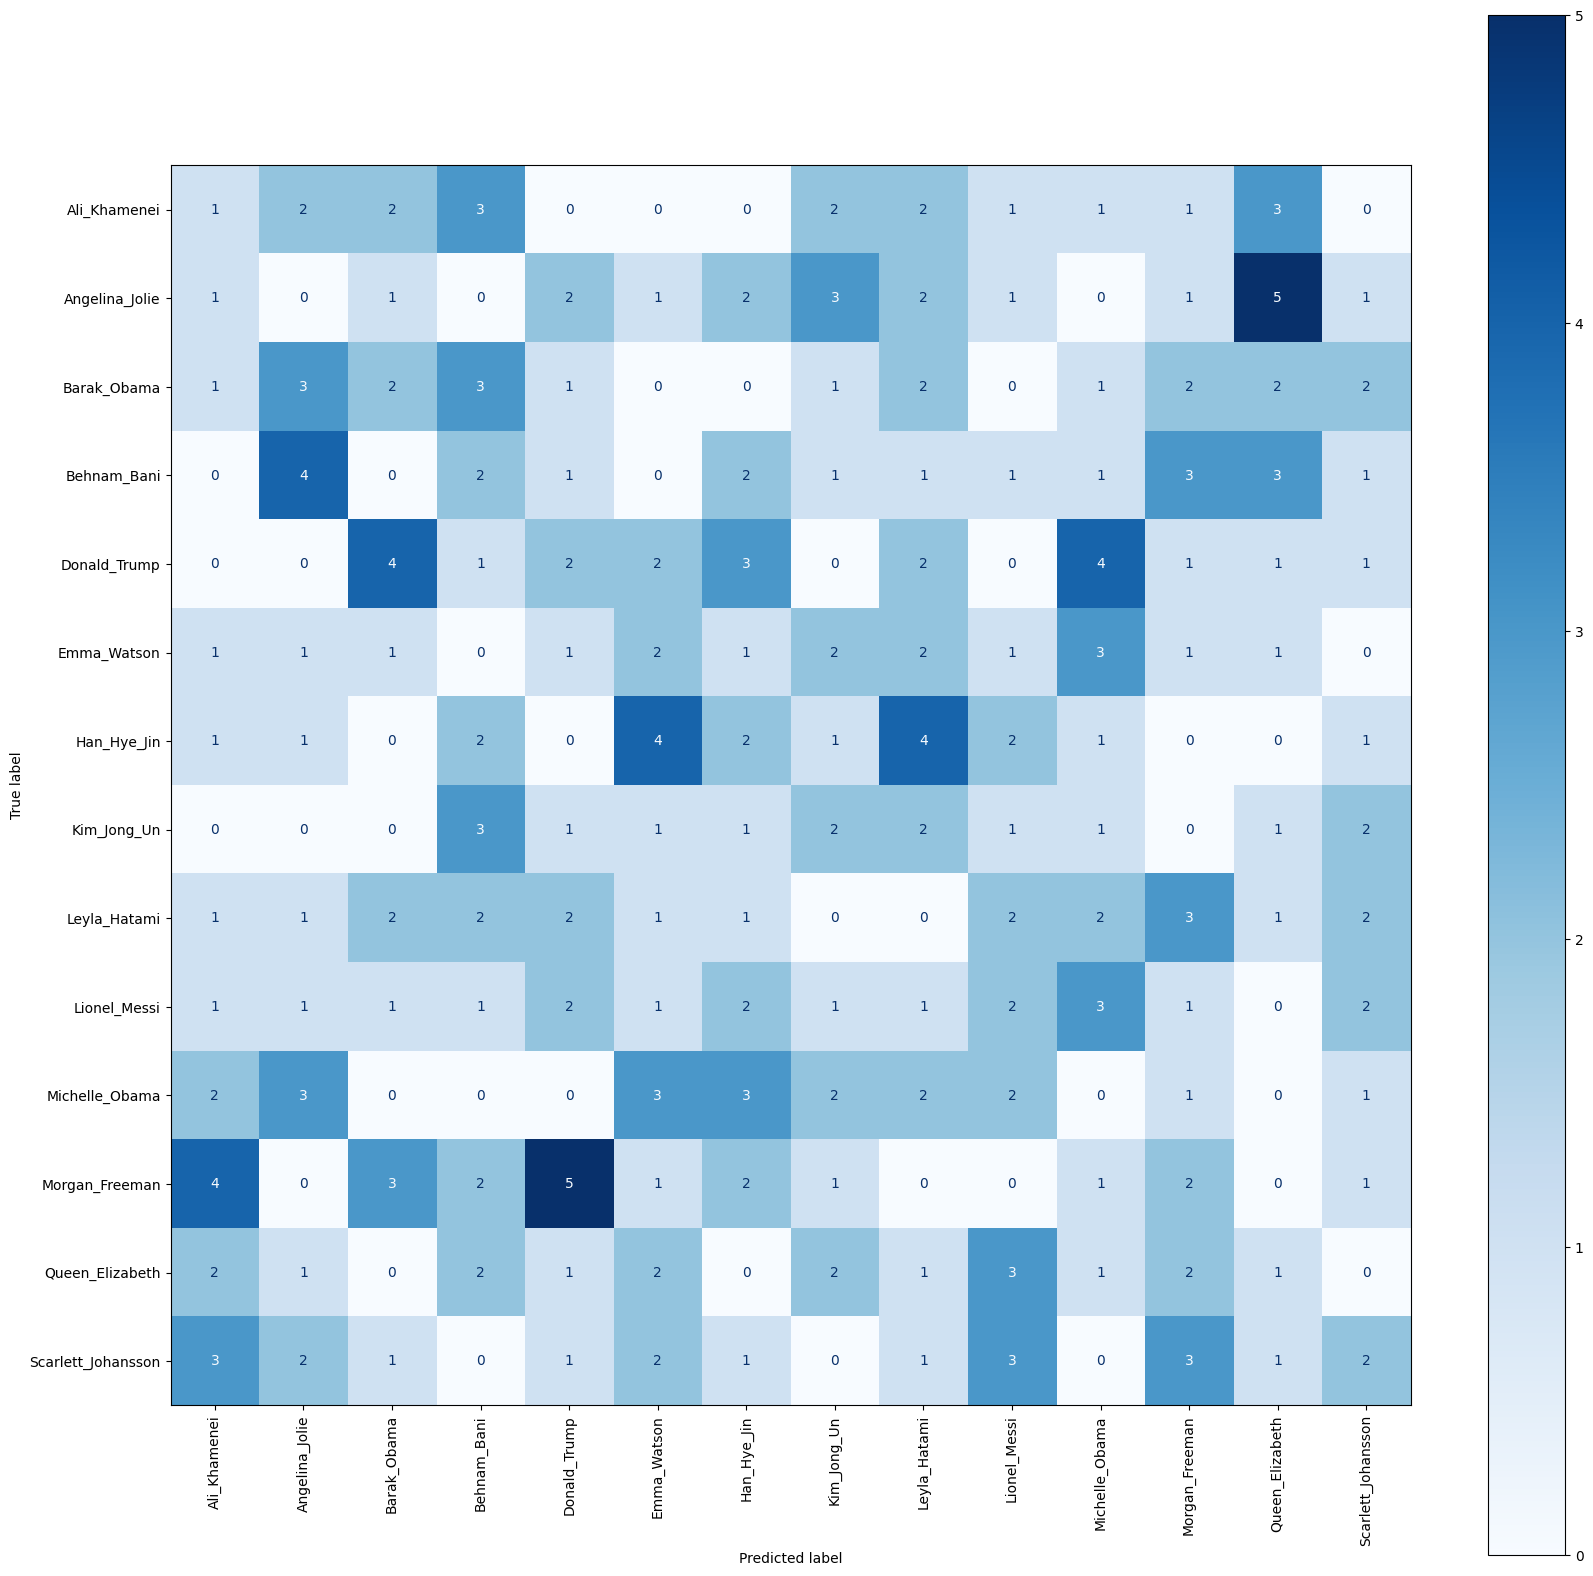

In [83]:
target_names = ['Ali_Khamenei', 'Angelina_Jolie', 'Barak_Obama', 'Behnam_Bani', 'Donald_Trump',
                 'Emma_Watson', 'Han_Hye_Jin', 'Kim_Jong_Un', 'Leyla_Hatami',
                 'Lionel_Messi', 'Michelle_Obama', 'Morgan_Freeman', 'Queen_Elizabeth', 'Scarlett_Johansson']

Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_data.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
font={'size':'10'}
plt.rc('font',**font)
disp.plot(cmap='Blues',xticks_rotation=90)
plt.show()


##Inference

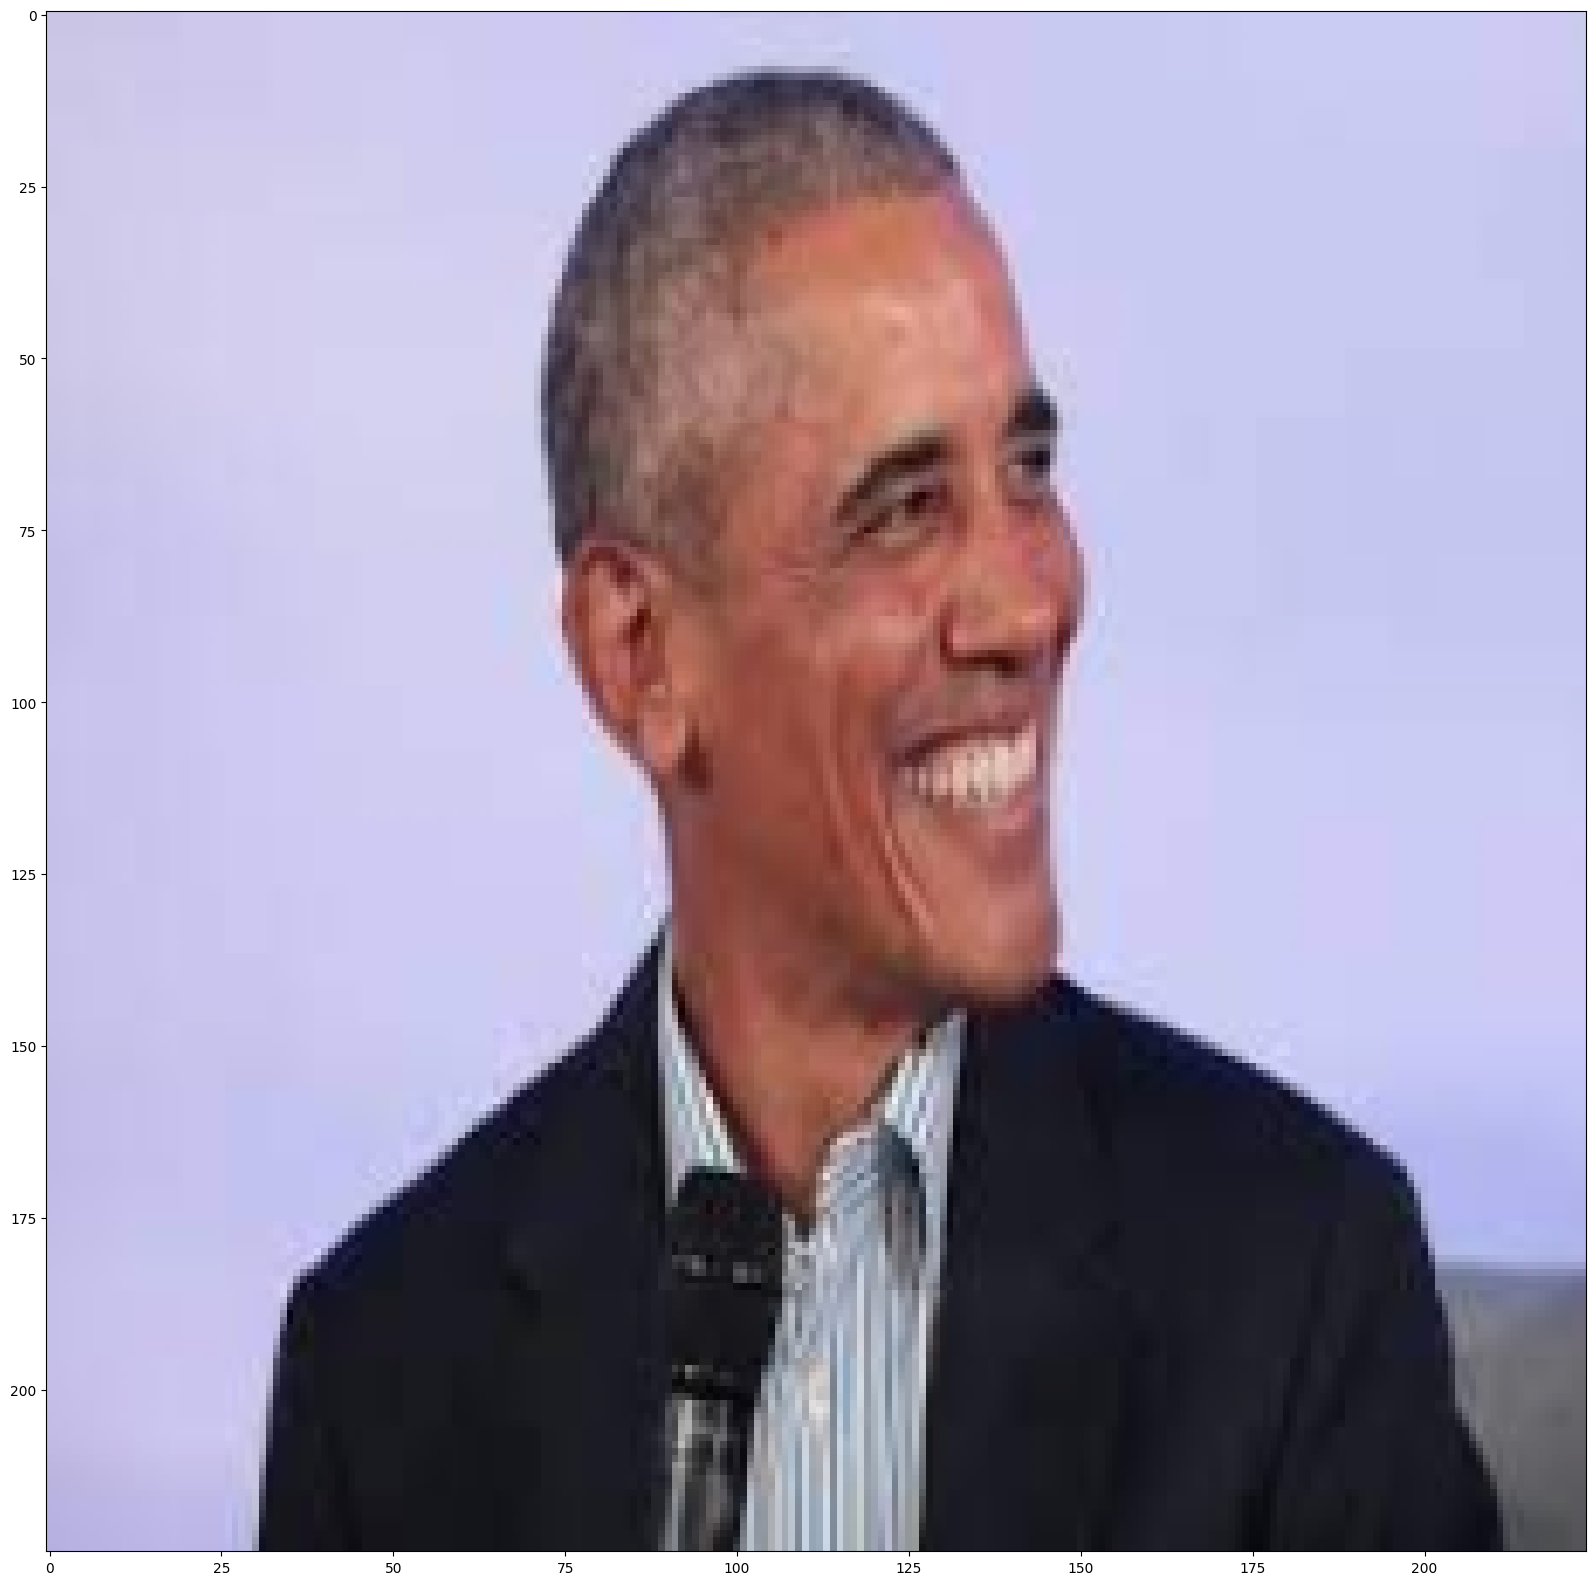

In [92]:
image = cv2.imread('/content/barak_obama.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = cv2.resize(image ,(width,height))
plt.imshow(img)


In [93]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = img / 255
img = img.reshape(1,width,height,3)

result = np.argmax(model.predict(img))
target_names[result]

1/1 [==============================] - 0s 125ms/step


'Barak_Obama'

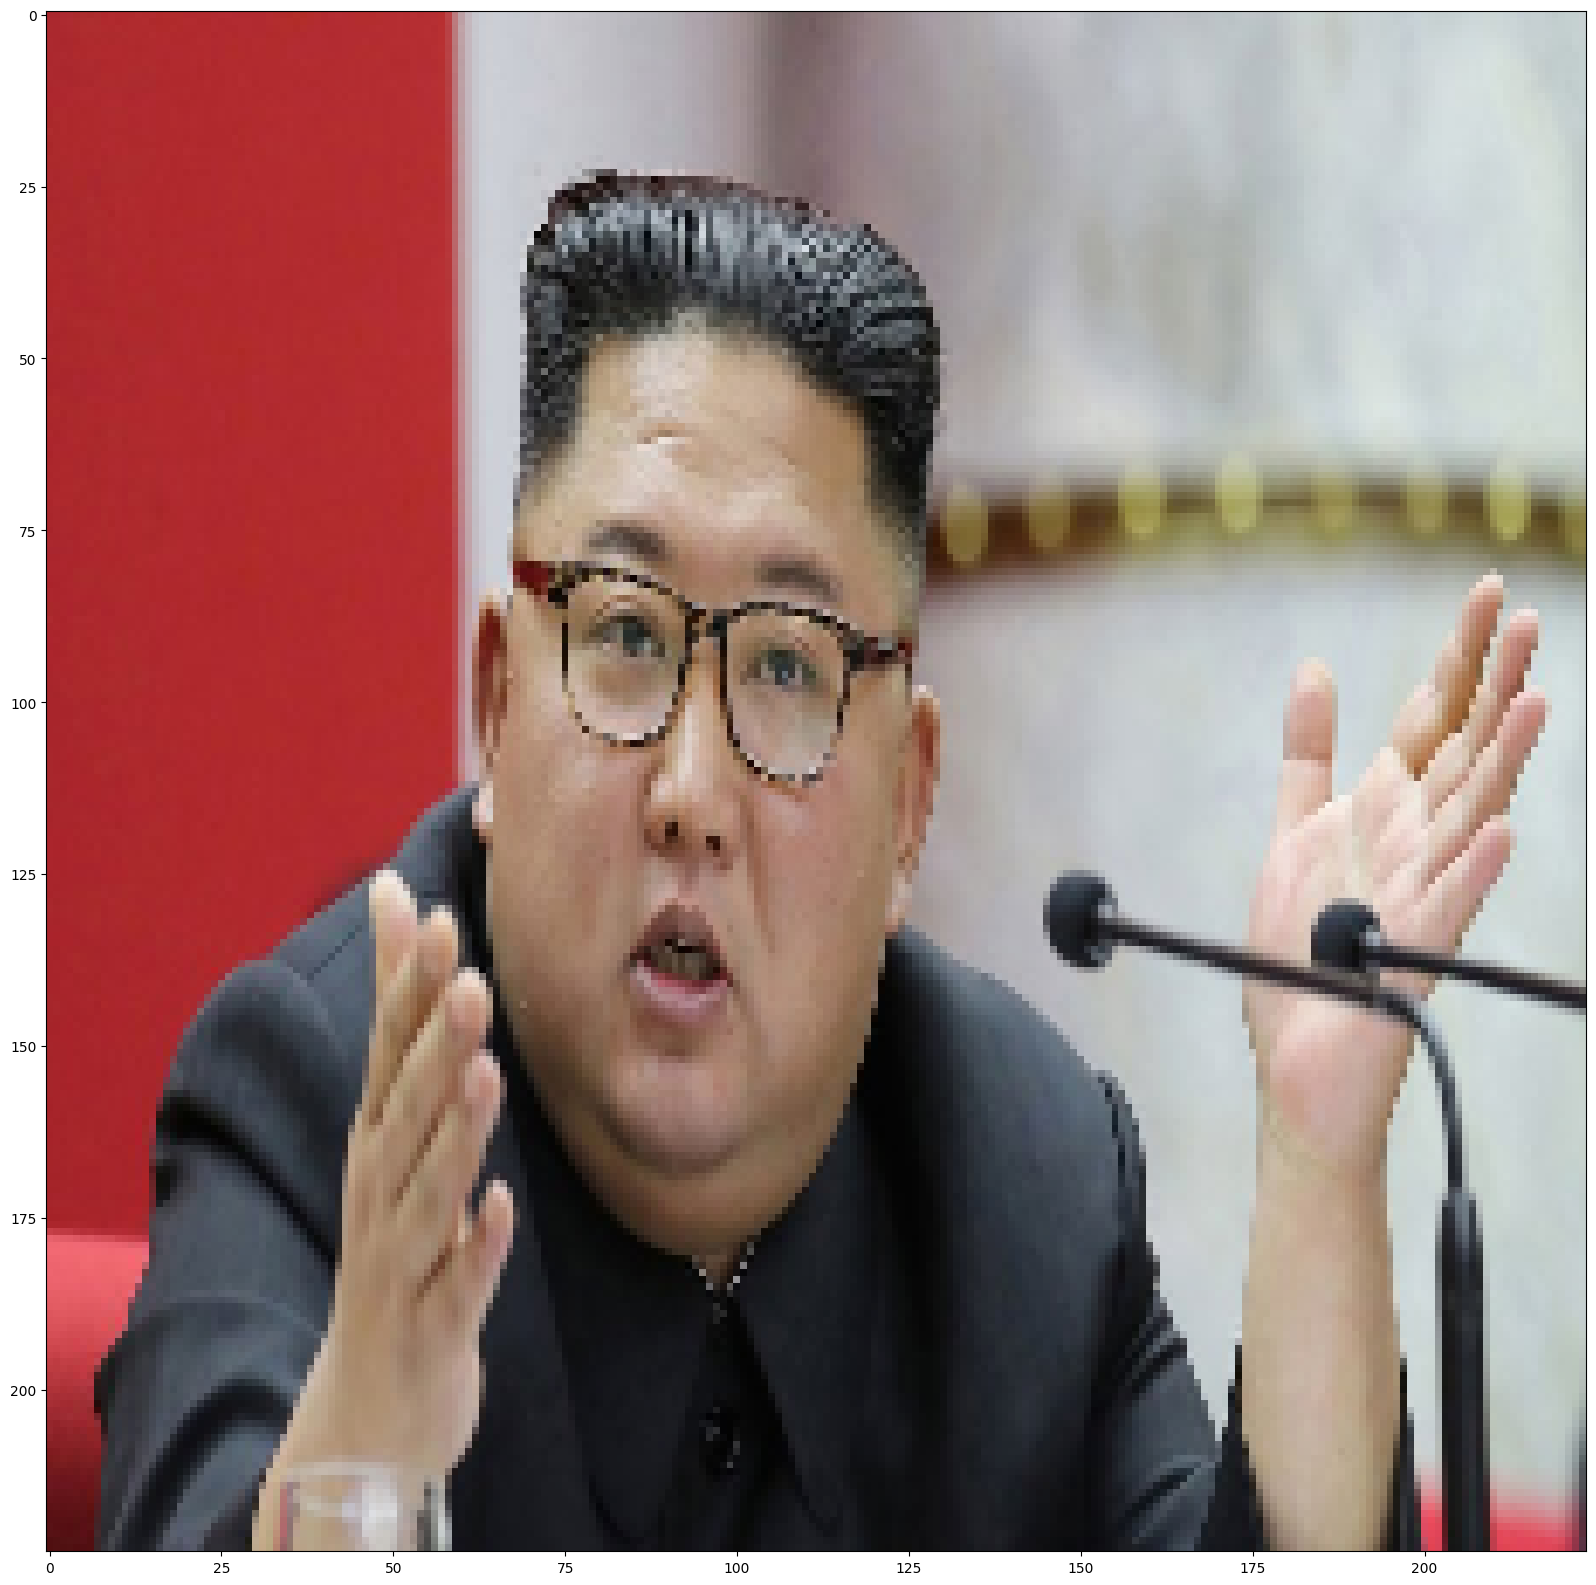

In [90]:
image = cv2.imread('/content/Kim_Jong_Un.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = cv2.resize(image ,(width,height))
plt.imshow(img)

In [91]:
img = img / 255
img = img.reshape(1,width,height,3)

result = np.argmax(model.predict(img))
target_names[result]

1/1 [==============================] - 0s 88ms/step


'Kim_Jong_Un'

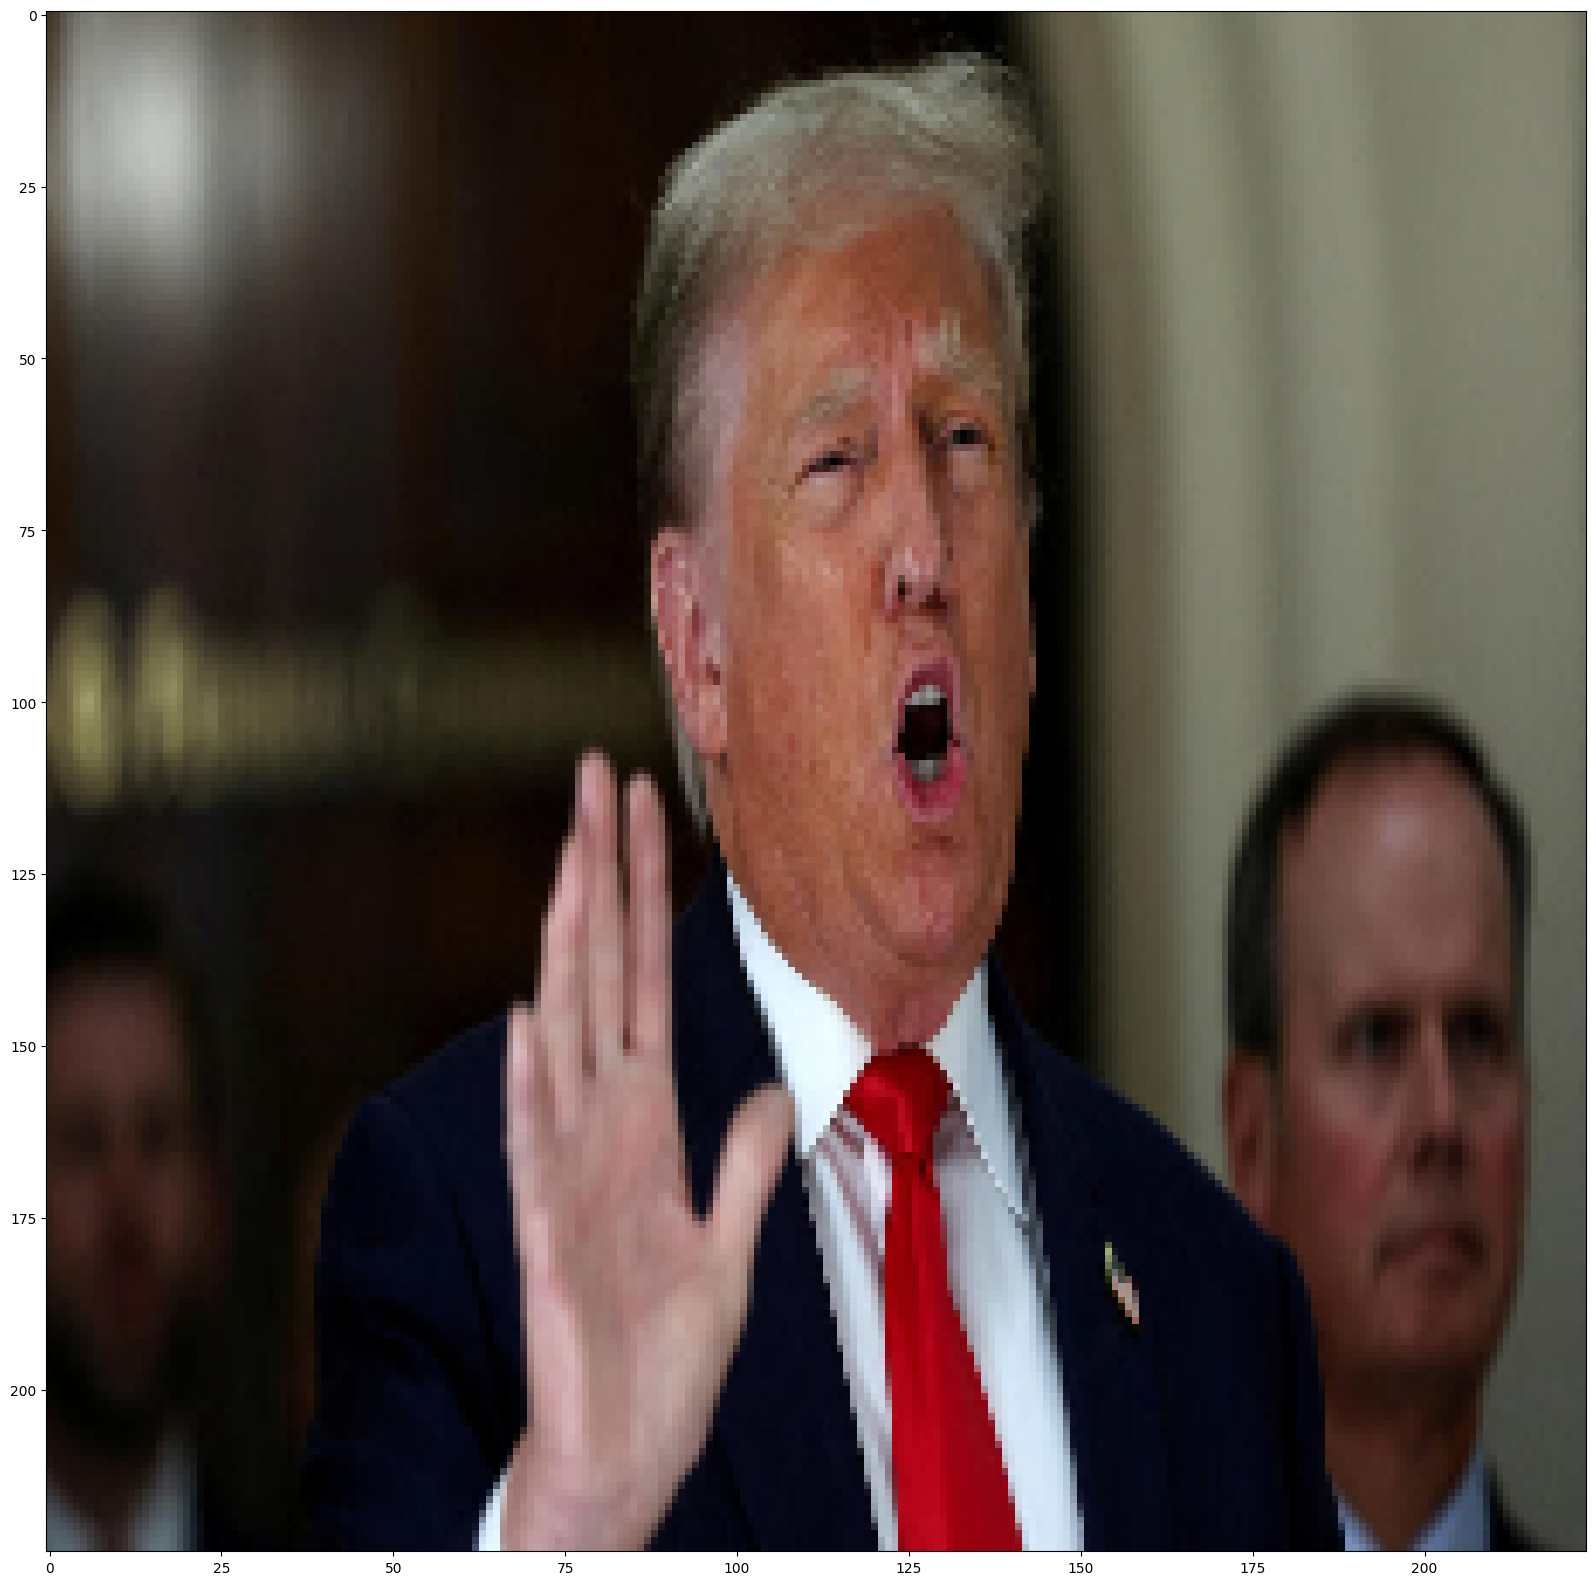

In [94]:
image = cv2.imread('/content/Trump.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = cv2.resize(image ,(width,height))
plt.imshow(img)

In [95]:
img = img / 255
img = img.reshape(1,width,height,3)

result = np.argmax(model.predict(img))
target_names[result]

1/1 [==============================] - 0s 48ms/step


'Donald_Trump'